# Tutorial 1: Data Preprocessing

---

### Introduction

Welcome! This tutorial will show you how to visualise and preprocess astronomical data using python. From this tutorial, you will learn the following:

1. How to download astronomical data
2. How to read and visualise data
3. How to preprocess imagery data

The data [GalaxyMNIST](https://github.com/mwalmsley/galaxy_mnist) contains 10,000 images of galaxies (either 3x64x64 or 3x224x224), confidently labelled by Galaxy Zoo volunteers as belonging to one of four morphology classes, where the classes are:

1. smooth and round
2. smooth and cigar-shaped
3. edge-on-disk
4. unbarred spiral

The galaxies are selected from `Galaxy Zoo DECaLS Campaign` A (GZD-A). The images are shown to volunteers on Galaxy Zoo for them to classify. At least 17 people must have been asked the necessary questions, and at least half of them must have answered with the given class. The class labels are, therefore, much more confident than, for example, simply labelling with the most common answer to some question. For more info, visit this [link](https://github.com/mwalmsley/galaxy_mnist)

@@@(just trying to set up the stage for upcoming tutorials, and give the audince a history lesson :D)

Labelling data is a big topic in machine learning. Labelled data allow us to use supervised machine learning tools to train on labelled data and classify unlabeled ones. However, labelling data can be costly. Scientists have been trying to figure out a way to label data, but the easiest is that we can depend on human knowledge to label data like the `Galaxy Zoo DECaLS Campaign`.  However, unlabeled data can also be of some benefit if analyzed with the right tools, like unsupervised machine learning. Those tools allow us to explore (find patterns) and cluster the data, leading to discoveries in the data.


---

### Downloading data

First, let us call the python script that will let us download the data.

In [1]:
from galaxy_mnist import GalaxyMNISTHighrez

'GalaxyMNISTHighrez' class has the follwing attribuits: 
 - `root`: Specifing the dir to download the data
 - `download:` A boolean value, `True` to download the images
 - `train:` A boolean value, `True` to assign the just the training data, `False` will assgin just the testing data. 
   - `Notice:` The data has a fixed 80/20 train/test division.

In [2]:
# for the training data
dataset_train = GalaxyMNISTHighrez(
    root='data_import/data',
    download=True,
    train=True  # by default True, or False for canonical test set
)
# for the testing data
dataset_test = GalaxyMNISTHighrez(
    root='data_import/data',
    download=True,
    train=False  # by default True, or False for canonical test set
)

---

### Reading data

first, let us read inputs `images` and outputs `labels` into two seperate variables

In [3]:
images_train = dataset_train.data
labels_train = dataset_train.targets

let us check the shape of the two datasets (traning, and testing)

In [4]:
print("Shape of the input (training) "+str(images_train.shape)+ ", type: "+ str(images_train.dtype))
print("Shape of the output (training) "+str(labels_train.shape)+ ", type: "+ str(labels_train.dtype))



Shape of the input (training) torch.Size([8000, 3, 224, 224]), type: torch.uint8
Shape of the output (training) torch.Size([8000]), type: torch.int64


we notice the following:
 1. The input data has 8000 samples with 3 channels, which stands for `rgb` colors, where each sample has a size of 224
 2. the output is just one dimnsional array, which contains the lables of the samples, and as we mentioned above the label can be one of the following: a)  2. the output is just one dimnsional array, which contains the lables of the samples.

**Exercise 1:**
Store the testing set inputs and outputs into two different variables, and display their shape.

In [5]:
### -- Code here --



Now, let us check the frequency of the labels/output, but fiest let us orint them out.

In [6]:
GalaxyMNISTHighrez.classes

['smooth_round', 'smooth_cigar', 'edge_on_disk', 'unbarred_spiral']

   **Where**:
   - 0: `smooth_round`,
   - 1: `smooth_cigar`,
   - 2: `edge_on_disk`,
   - 3: `unbarred_spiral`

to count the frequncy of the labels, we will convert the data into pandas dataframe
@@ Ezra, do you think we can do this step better?

In [7]:
import pandas as pd # for importing data into data frame format

In [8]:
df_labelsTrain = pd.DataFrame(labels_train)
dict_train =  df_labelsTrain.stack().value_counts().to_dict()
print(dict_train)

{3: 2020, 1: 1994, 0: 1993, 2: 1993}


### Data visualisation

we can also try to visualse label frequencies in a bar graph, but first let us call the package that will allow us to draw the graphs

In [9]:
import matplotlib.pyplot as plt #This displays graphs once they have been created

Dict: {'smooth_round': 1993, 'smooth_cigar': 1994, 'edge_on_disk': 1993, 'unbarred_spiral': 2020}


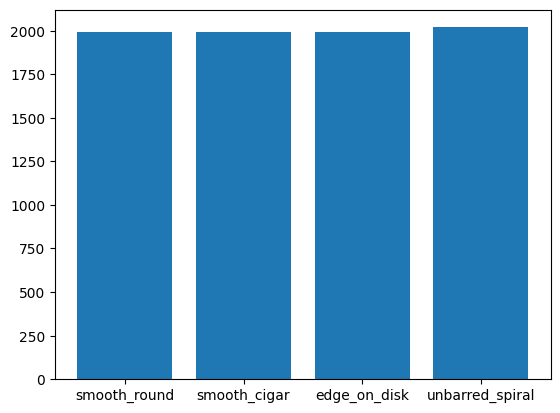

In [10]:


for newKey, oldKey in  zip( GalaxyMNISTHighrez.classes, sorted(dict_train.keys()) ): 
    dict_train[newKey] = dict_train.pop(oldKey)  # changing the key names


plt.bar(range(len(dict_train)), list(dict_train.values()), align='center')
plt.xticks(range(len(dict_train)), list(dict_train.keys()))
print("Dict: "+str(dict_train))

plt.show()

**Exercise 2:**
Count the frequency for the testing data and visualise it

In [11]:
### -- Code here --


Now let us take a look at the images of the different galaxy shapes

In [12]:
import numpy as np # For handling N-DIMENSIONAL ARRAYS
from PIL import Image #  PIL is the Python Imaging Library

In [13]:
class0 = np.where (np.array(labels_train) == 0 )
class1 = np.where (np.array(labels_train) == 1 )
class2 = np.where (np.array(labels_train) == 2 )
class3 = np.where (np.array(labels_train) == 3 )

label: smooth_round


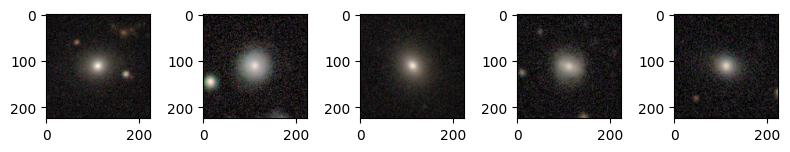

label: smooth_cigar


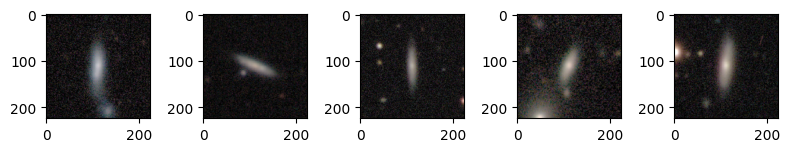

label: edge_on_disk


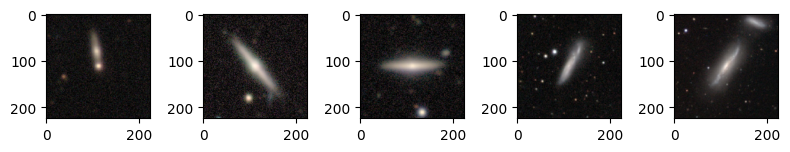

label: unbarred_spiral


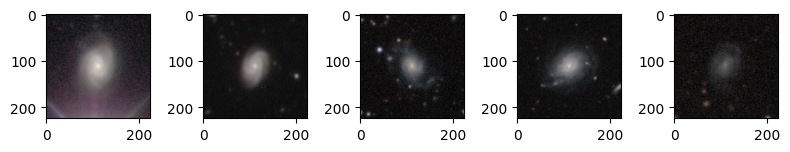

In [14]:
rows = 1
columns = 5
for classArr in [class0, class1, class2, class3]:
    fig = plt.figure(figsize=(8, 8))
    for i in range (5):
        train_image, train_label = dataset_train[classArr[0][i]]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(train_image)
    print("label: "+str(GalaxyMNISTHighrez.classes[train_label]))
    plt.tight_layout()
    plt.show()     # increase the number of images per class

The resolution of this dataset does not seem to be good, `smooth cigar` and `edge_on_disk` kind of look like each other, which will give us problems later on when performing classification or clustering.

---

### Data preprocessing

Classical machine learning usually requires the data to go under many layers of processing so it can be fit for training (e.g. preprocessing, feature extraction, optimization, ..). For each layer, many different algorithms may be used. 

On the other hand, deep learning models with enough data are often referred to as End-to-End learning models ([E2E](https://towardsdatascience.com/e2e-the-every-purpose-ml-method-5d4f20dafee4)), since it can extract information from raw data.

In the following tutorial, we will use an autoencoder (deep learning) model to extract features. Therefore we can feed it the raw data. So a question arises, why are we preprocessing the data? Well, for two reasons related to time complexity. We need to train Deep learning models in a reasonable time so that we can bring the idea across, but more importantly, tuning the hyperparameters for deep learning models can be very tough; therefore, if we think that we can manually reduce the complexity of the data without losing lots/any information that would be a perfect idea. 

But How Can we tell if we lost lots of info? In our case, since the data is imagery data, we can notify in two ways.
a) if our eyes can manually still classify the images, we can conclude that the preprocessing is a good idea.
b) testing the results of the preprocessed data on a validation set and comparing it against the original/raw data.

This is a suggested pipeline. However, participants are encouraged to explore.

In this tutorial, we will try to reduce the complexity of the data by doing the following:
   - Reduce the number of channels from RGB to greyscale.
   - Reduce the size of the image by a factor of 4.
   - Perform normalization (divide by 255)

#### a- [Grayscale](https://www.tutorialspoint.com/pytorch-how-to-convert-an-image-to-grayscale)

In [15]:
import torchvision.transforms as transforms #Transforms are for common image transformations

In [16]:
images_train.shape

torch.Size([8000, 3, 224, 224])

We can see that the original image size has three channels which stand for the RGB colours, now let us perfom the `greyscalling`

In [30]:
transformGrey = transforms.Grayscale()
images_trainGrey = transformGrey(images_train)

Now let us check the size of the tensor

In [31]:
images_trainGrey.shape

torch.Size([8000, 1, 224, 224])

we can see the number of channels went down from 3 to 1

**Exercise 3:**
Visualise the grayscale images for all classes

label: smooth_round


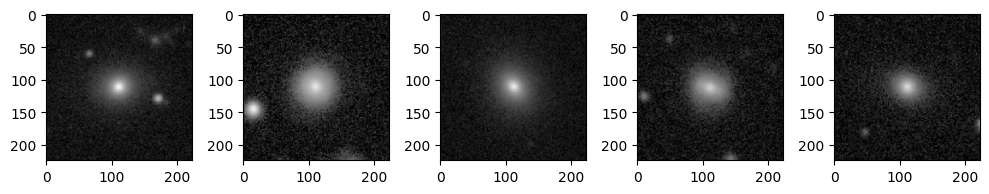

label: smooth_cigar


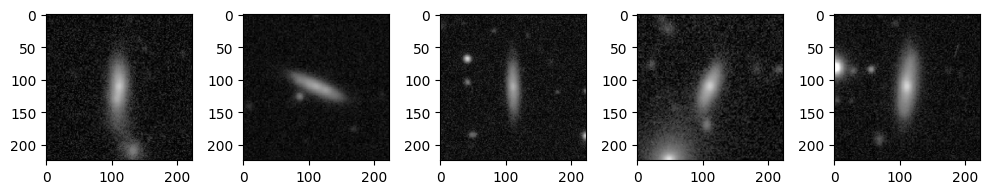

label: edge_on_disk


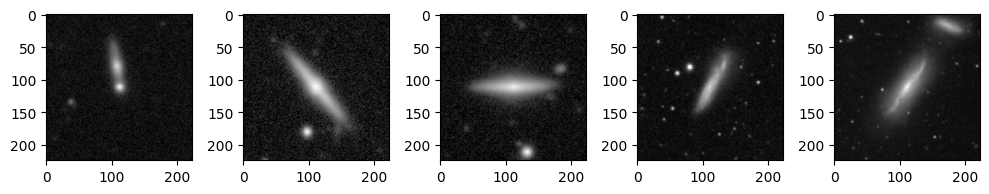

label: unbarred_spiral


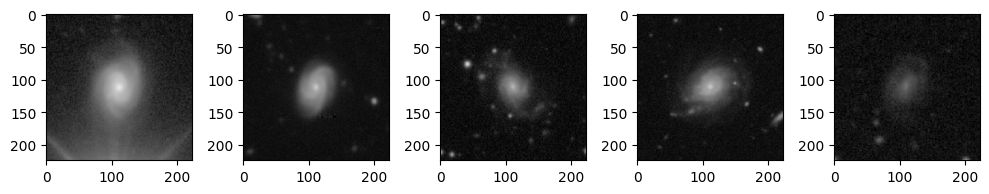

In [32]:
### -- Code here__

rows = 1
columns = 5

for classArr in [ [class0,0], [class1,1], [class2,2], [class3,3]]:
    fig = plt.figure(figsize=(10, 10))
    for i in range (5):
        train_image = images_trainGrey[classArr[0][0][i]]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(train_image[0],cmap='gray', vmin=0, vmax=255 )
    print("label: "+str(GalaxyMNISTHighrez.classes[classArr[1]]))
    plt.tight_layout()
    plt.show()  
    

We can notice that visually that nothing changed much from the original data. However, we reduced the complexity of the data by a favour of 3, which is enormous!

#### b- [Size reduction](https://www.tutorialspoint.com/pytorch-how-to-resize-an-image-to-a-given-size)

In [34]:
transformResize = transforms.Resize(56)

Now let us reduce the image, we will reduce it on the grayscale images

In [35]:
images_trainResized = transformResize(images_trainGrey)

now let us check the size

In [36]:
images_trainResized.shape

torch.Size([8000, 1, 56, 56])

**Exercise 4:**
Visualise the resized images for all classes

label: smooth_round


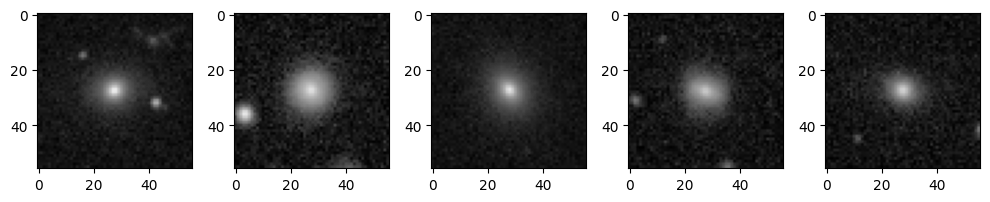

label: smooth_cigar


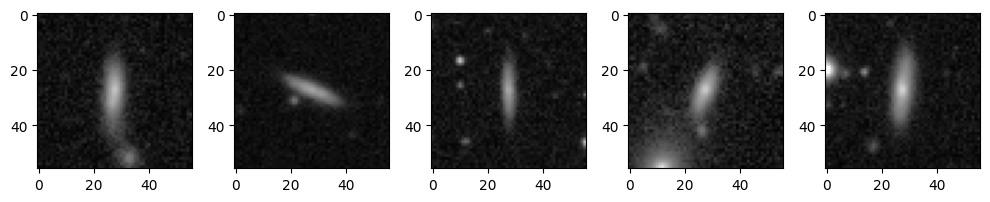

label: edge_on_disk


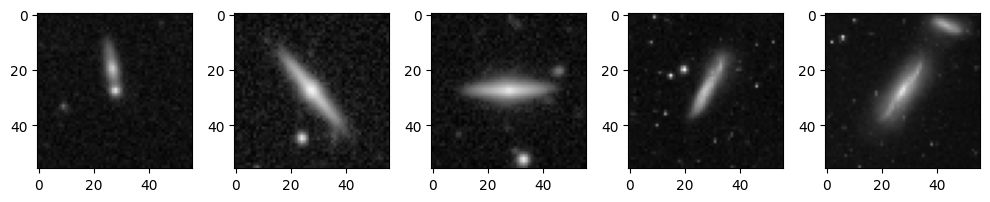

label: unbarred_spiral


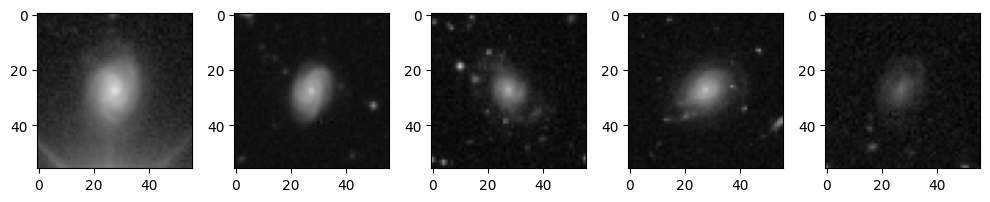

In [37]:
#___ Code here___

for classArr in [ [class0,0], [class1,1], [class2,2], [class3,3]]:
    fig = plt.figure(figsize=(10, 10))
    for i in range (5):
        train_image = images_trainResized[classArr[0][0][i]]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(train_image[0],cmap='gray', vmin=0, vmax=255 )
    print("label: "+str(GalaxyMNISTHighrez.classes[classArr[1]]))
    plt.tight_layout()
    plt.show()  

#### c- Normalization

Now we will simply try to devide the pixel values by 255. Where the goal is to transform features to be on a similar scale ([source](https://developers.google.com/machine-learning/data-prep/transform/normalization)).

In [24]:
images_trainPre = images_trainResized/255

Now let us check the values before and after the nomalisatiom

In [25]:
print(images_trainResized[0][0][0])
print(images_trainPre[0][0][0])

tensor([24, 35, 16, 27, 11, 20,  7, 15, 15, 19, 14, 11,  5, 15, 37, 25, 17, 22,
        12, 22, 12,  6, 20,  5, 18, 15, 14, 31, 14, 12, 27, 18, 28, 22, 25, 17,
        25,  6,  5, 26, 22,  2, 14, 12, 14,  7, 16, 26, 12, 19, 13, 34, 36, 17,
        13, 20], dtype=torch.uint8)
tensor([0.0941, 0.1373, 0.0627, 0.1059, 0.0431, 0.0784, 0.0275, 0.0588, 0.0588,
        0.0745, 0.0549, 0.0431, 0.0196, 0.0588, 0.1451, 0.0980, 0.0667, 0.0863,
        0.0471, 0.0863, 0.0471, 0.0235, 0.0784, 0.0196, 0.0706, 0.0588, 0.0549,
        0.1216, 0.0549, 0.0471, 0.1059, 0.0706, 0.1098, 0.0863, 0.0980, 0.0667,
        0.0980, 0.0235, 0.0196, 0.1020, 0.0863, 0.0078, 0.0549, 0.0471, 0.0549,
        0.0275, 0.0627, 0.1020, 0.0471, 0.0745, 0.0510, 0.1333, 0.1412, 0.0667,
        0.0510, 0.0784])


##### **_End of the pre-processing pipeline_**

Now the above pre-processing is not the only way where we can reduce the features, the following can also be done:
1. Cropping images away from the centre
2. Image segmentation, maybe to remove background noise (Deep learning can be used for this)
3. ?

**Exercise 5**: Perform the pre-processing pipeline but on the testing set

In [ ]:
#___ Code here___


---

### **_End of Tutorial 1_**